##Data Loading

In [1]:
# Import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML later
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Load datasets

sentiment = pd.read_csv("fear_greed_index.csv")
trades = pd.read_csv("historical_data.csv")

# Display first rows
print("Sentiment Data:")
display(sentiment.head())

print("Trader Data:")
display(trades.head())

Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


## Data Understanding

In [2]:
print("Sentiment Dataset Info:")
print(sentiment.info())

print("\nTrader Dataset Info:")
print(trades.info())

Sentiment Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None

Trader Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non

In [3]:
print("Sentiment shape:", sentiment.shape)
print("Trader shape:", trades.shape)

Sentiment shape: (2644, 4)
Trader shape: (211224, 16)


In [4]:
print("Sentiment columns:", sentiment.columns)
print("Trader columns:", trades.columns)

Sentiment columns: Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Trader columns: Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp'], dtype='object')


## Data Cleaning

In [5]:
# Check missing values in sentiment dataset

print("Missing values in Sentiment dataset:")
sentiment_missing = sentiment.isnull().sum()
print(sentiment_missing)


# Check missing values in trader dataset

print("\nMissing values in Trader dataset:")
trader_missing = trades.isnull().sum()
print(trader_missing)

Missing values in Sentiment dataset:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Missing values in Trader dataset:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [6]:
# Check duplicates
print("Sentiment duplicate rows:", sentiment.duplicated().sum())
print("Trader duplicate rows:", trades.duplicated().sum())

Sentiment duplicate rows: 0
Trader duplicate rows: 0


In [7]:
# Standardize sentiment column names
sentiment.columns = sentiment.columns.str.lower().str.replace(" ", "_")

# Standardize trader column names
trades.columns = trades.columns.str.lower().str.replace(" ", "_")

# Verify changes
print("Sentiment columns:")
print(sentiment.columns)

print("\nTrader columns:")
print(trades.columns)

Sentiment columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Trader columns:
Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side', 'timestamp_ist', 'start_position', 'direction', 'closed_pnl', 'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id', 'timestamp'], dtype='object')


In [8]:
# Convert sentiment labels to proper format (capitalize first letter)
# This avoids duplicate categories like "fear" and "Fear"
sentiment['classification'] = sentiment['classification'].str.capitalize()

# Check the distribution of sentiment categories
# This helps analyze sentiment balance and identify dominant market emotions
print("Sentiment Distribution:\n")
print(sentiment['classification'].value_counts())

Sentiment Distribution:

classification
Fear             781
Greed            633
Extreme fear     508
Neutral          396
Extreme greed    326
Name: count, dtype: int64


In [9]:
print(sentiment.dtypes)
print(trades.dtypes)

timestamp          int64
value              int64
classification    object
date              object
dtype: object
account              object
coin                 object
execution_price     float64
size_tokens         float64
size_usd            float64
side                 object
timestamp_ist        object
start_position      float64
direction            object
closed_pnl          float64
transaction_hash     object
order_id              int64
crossed                bool
fee                 float64
trade_id            float64
timestamp           float64
dtype: object


In [10]:
# Convert 'closed_pnl' to numeric for accurate financial analysis
trades['closed_pnl'] = pd.to_numeric(trades['closed_pnl'], errors='coerce')

# Generate statistical summary to understand profit/loss behavior
print("Profit/Loss Statistical Summary:\n")
print(trades['closed_pnl'].describe())

Profit/Loss Statistical Summary:

count    211224.000000
mean         48.749001
std         919.164828
min     -117990.104100
25%           0.000000
50%           0.000000
75%           5.792797
max      135329.090100
Name: closed_pnl, dtype: float64


In [11]:
# Standardize classification text

sentiment['classification'] = sentiment['classification'].str.lower().str.strip()

# Create binary sentiment column

def binary_sentiment(x):
    if 'fear' in x:
        return 'Fear'
    elif 'greed' in x:
        return 'Greed'
    else:
        return 'Neutral'

sentiment['sentiment_binary'] = sentiment['classification'].apply(binary_sentiment)

# Create sentiment score (for ML)
sentiment_score_map = {
    'extreme fear': -2,
    'fear': -1,
    'neutral': 0,
    'greed': 1,
    'extreme greed': 2
}
sentiment['sentiment_score'] = sentiment['classification'].map(sentiment_score_map)
# Verify
print(sentiment[['classification','sentiment_binary','sentiment_score']].head())
print("\nBinary sentiment distribution:")
print(sentiment['sentiment_binary'].value_counts())

  classification sentiment_binary  sentiment_score
0           fear             Fear               -1
1   extreme fear             Fear               -2
2           fear             Fear               -1
3   extreme fear             Fear               -2
4   extreme fear             Fear               -2

Binary sentiment distribution:
sentiment_binary
Fear       1289
Greed       959
Neutral     396
Name: count, dtype: int64


In [12]:
print("Final Sentiment shape:", sentiment.shape)

print("Final Trader shape:", trades.shape)

display(sentiment.head())

display(trades.head())

Final Sentiment shape: (2644, 6)
Final Trader shape: (211224, 16)


,timestamp,value,classification,date,sentiment_binary,sentiment_score
0,1517463000,30,fear,2018-02-01,Fear,-1
1,1517549400,15,extreme fear,2018-02-02,Fear,-2
2,1517635800,40,fear,2018-02-03,Fear,-1
3,1517722200,24,extreme fear,2018-02-04,Fear,-2
4,1517808600,11,extreme fear,2018-02-05,Fear,-2


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


## Data Preprocessing

In [13]:
# Convert timestamp_ist to datetime
trades['timestamp_ist'] = pd.to_datetime(
    trades['timestamp_ist'],
    format='%d-%m-%Y %H:%M',
    errors='coerce'
)

# Extract date
trades['date'] = trades['timestamp_ist'].dt.date

# Verify
display(trades[['timestamp_ist','date']].head())

,timestamp_ist,date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [14]:
# Standardize sentiment date format for accurate time-series analysis and merging
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

# Preview the cleaned sentiment data
print("Sentiment Data Preview After Date Conversion:\n")
display(sentiment[['date','classification']].head())

Sentiment Data Preview After Date Conversion:



,date,classification
0,2018-02-01,fear
1,2018-02-02,extreme fear
2,2018-02-03,fear
3,2018-02-04,extreme fear
4,2018-02-05,extreme fear


In [15]:
print("Trader date range:")
print(trades['date'].min(), "to", trades['date'].max())

print("\nSentiment date range:")
print(sentiment['date'].min(), "to", sentiment['date'].max())

Trader date range:
2023-05-01 to 2025-05-01

Sentiment date range:
2018-02-01 to 2025-05-02


In [16]:
# Merge trades data with sentiment features using the 'date' column
# This adds sentiment classification and numerical sentiment features to each trade
merged = trades.merge(
    sentiment[['date','classification','sentiment_binary','sentiment_score']],
    on='date',
    how='left'  # Keep all trades, even if sentiment data is missing
)

# Display the shape to verify merge success and check dataset size
print("Merged dataset shape:", merged.shape)

# Preview the merged dataset to confirm sentiment columns are added correctly
display(merged.head())

Merged dataset shape: (211224, 20)


,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,classification,sentiment_binary,sentiment_score
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,extreme greed,Greed,2.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,extreme greed,Greed,2.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,extreme greed,Greed,2.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,extreme greed,Greed,2.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,extreme greed,Greed,2.0


In [17]:
print("Missing sentiment after merge:")

print(merged['classification'].isnull().sum())

Missing sentiment after merge:
6


## Feature Engineering

In [18]:
# Create a binary column indicating whether the trade was profitable
# 1 → Profit (closed_pnl > 0), 0 → Loss or no profit
# This feature is useful for profitability analysis and machine learning classification
merged['is_profit'] = (merged['closed_pnl'] > 0).astype(int)

# Preview profit/loss values along with the new binary profit indicator
merged[['closed_pnl','is_profit']].head()

,closed_pnl,is_profit
0,0.0,0
1,0.0,0
2,0.0,0
3,0.0,0
4,0.0,0


In [19]:
# Calculate total daily profit/loss for each account
# This aggregates all trades of an account on a given date into a single daily performance value
daily_pnl = merged.groupby(['account','date']).agg({
    'closed_pnl':'sum'
}).reset_index()

# Rename the column for better clarity and readability
# 'daily_pnl' clearly represents total profit/loss per account per day
daily_pnl.rename(columns={'closed_pnl':'daily_pnl'}, inplace=True)

# Preview the daily profit/loss data
display(daily_pnl.head())

,account,date,daily_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,0.0
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,0.0
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,0.0
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,-21227.0
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,1603.1


In [20]:
# Calculate win rate for each account
# Win rate is the percentage of trades that were profitable
# Since 'is_profit' is binary (1 = profit, 0 = loss), the mean gives the win rate
win_rate = merged.groupby('account').agg({
    'is_profit':'mean'
}).reset_index()

# Rename the column for better clarity
# 'win_rate' represents the success rate of trades for each account
win_rate.rename(columns={'is_profit':'win_rate'}, inplace=True)

# Preview the win rate data for each account
display(win_rate.head())

,account,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914


In [21]:
# Calculate the average trade size for each account in USD
# This helps understand the typical trading volume and risk level per account
avg_trade_size = merged.groupby('account').agg({
    'size_usd':'mean'
}).reset_index()

# Rename the column for better clarity and professional readability
avg_trade_size.rename(columns={'size_usd':'avg_trade_size_usd'}, inplace=True)

# Preview the average trade size data
display(avg_trade_size.head())

,account,avg_trade_size_usd
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782


In [22]:
# Calculate the number of trades executed per account per day
# This helps analyze trading activity frequency and behavioral patterns
trades_per_day = merged.groupby(['account','date']).size().reset_index(name='trades_per_day')

# Preview the trades per day data
display(trades_per_day.head())

,account,date,trades_per_day
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-11,177
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-17,68
2,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-18,40
3,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-22,12
4,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-11-26,27


In [23]:
# Calculate the total number of trades executed by each account
# This helps measure overall trading activity and participation level per account
avg_trades = merged.groupby('account').size().reset_index(name='total_trades')

# Preview the total trades per account
display(avg_trades.head())

,account,total_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,3818
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,7280
2,0x271b280974205ca63b716753467d5a371de622ab,3809
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,13311
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3239


In [24]:
# Create a binary column indicating trade direction
# 1 → Long position (BUY), 0 → Short position (SELL)
# This feature helps analyze trading strategy and can be used in ML models
merged['is_long'] = (merged['side'] == 'BUY').astype(int)

In [25]:
# Calculate the proportion of long trades (BUY) for each account
# Since 'is_long' is binary (1 = BUY, 0 = SELL), the mean gives the long trade ratio
long_short_ratio = merged.groupby('account').agg({
    'is_long':'mean'
}).reset_index()

# Rename the column for clarity
# 'long_ratio' represents the percentage of long positions taken by each account
long_short_ratio.rename(columns={'is_long':'long_ratio'}, inplace=True)

# Preview the long vs short ratio data
display(long_short_ratio.head())

,account,long_ratio
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.448140
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.419643
2,0x271b280974205ca63b716753467d5a371de622ab,0.411132
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.503268
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.364001


In [26]:
# Calculate the average profit or loss per trade for each account
# This helps evaluate overall trading performance and profitability efficiency
avg_pnl = merged.groupby('account').agg({
    'closed_pnl':'mean'
}).reset_index()

# Rename the column for better clarity and professional readability
avg_pnl.rename(columns={'closed_pnl':'avg_pnl'}, inplace=True)

# Preview the average profit/loss per account
display(avg_pnl.head())

,account,avg_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,419.127768
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,6.577654
2,0x271b280974205ca63b716753467d5a371de622ab,-18.492043
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,9.951530
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,52.071011


In [27]:
# Combine all calculated trader performance metrics into a single dataset
# This creates a comprehensive profile for each account including win rate,
# average trade size, total trades, long trade ratio, and average profit/loss
trader_metrics = win_rate.merge(avg_trade_size, on='account')

# Add total number of trades per account
trader_metrics = trader_metrics.merge(avg_trades, on='account')

# Add long vs short trade ratio for strategy analysis
trader_metrics = trader_metrics.merge(long_short_ratio, on='account')

# Add average profit/loss per trade to evaluate profitability
trader_metrics = trader_metrics.merge(avg_pnl, on='account')

# Preview the consolidated trader metrics dataset
display(trader_metrics.head())

,account,win_rate,avg_trade_size_usd,total_trades,long_ratio,avg_pnl
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612,16159.576734,3818,0.448140,419.127768
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720,1653.226327,7280,0.419643,6.577654
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917,8893.000898,3809,0.411132,-18.492043
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585,507.626933,13311,0.503268,9.951530
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914,3138.894782,3239,0.364001,52.071011


## Analysis

In [28]:
# Analyze trading performance based on sentiment category (Positive / Negative)
# This helps understand how market sentiment impacts trader profitability
sentiment_performance = merged.groupby('sentiment_binary').agg({

    # Calculate mean, median, and standard deviation of profit/loss
    # These metrics show average performance, central tendency, and variability
    'closed_pnl':['mean','median','std'],

    # Calculate win rate under each sentiment condition
    # Since 'is_profit' is binary, mean gives the percentage of profitable trades
    'is_profit':'mean'
})

# Display sentiment-based performance metrics
display(sentiment_performance)

closed_pnl                    is_profit
                       mean median         std      mean
sentiment_binary                                        
Fear              49.212077    0.0  990.875398  0.407871
Greed             53.882281    0.0  976.964281  0.420311
Neutral           34.307718    0.0  517.122220  0.396991

In [29]:
# Calculate the total profit or loss under each sentiment category
# This helps evaluate overall profitability during Positive and Negative sentiment periods
total_profit = merged.groupby('sentiment_binary')['closed_pnl'].sum()

# Display total profit/loss for each sentiment category
print(total_profit)

sentiment_binary
Fear       4.096266e+06
Greed      4.865301e+06
Neutral    1.292921e+06
Name: closed_pnl, dtype: float64


In [30]:
# Calculate the average trade size under each sentiment category
# This helps analyze whether traders take larger or smaller positions
# during Positive vs Negative market sentiment
merged.groupby('sentiment_binary')['size_usd'].mean()

,size_usd
sentiment_binary,
Fear,7182.011019
Greed,4574.424490
Neutral,4782.732661


In [31]:
# Count the total number of trades under each sentiment category
# This helps understand trade frequency during Positive vs Negative sentiment periods
merged.groupby('sentiment_binary').size()

,0
sentiment_binary,
Fear,83237
Greed,90295
Neutral,37686


In [32]:
# Calculate the proportion of long (BUY) trades under each sentiment category
# Since 'is_long' is binary (1 = BUY, 0 = SELL), the mean gives the long trade ratio
# This helps analyze whether traders prefer long or short positions under different sentiments
merged.groupby('sentiment_binary')['is_long'].mean()

,is_long
sentiment_binary,
Fear,0.495032
Greed,0.470857
Neutral,0.503343


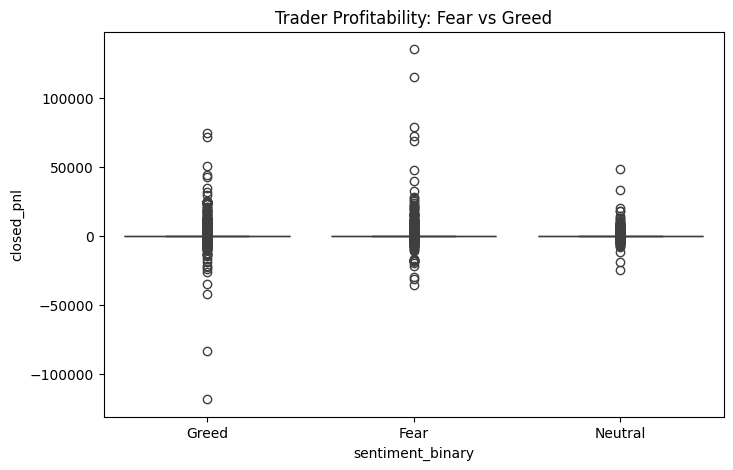

In [33]:
# Create a boxplot to visualize profit/loss distribution across sentiment categories
# This helps compare trader profitability under different market sentiments (Positive vs Negative)
plt.figure(figsize=(8,5))

sns.boxplot(
    data=merged,
    x='sentiment_binary',   # Sentiment category (Positive / Negative)
    y='closed_pnl'          # Profit or loss per trade
)

# Add title for better interpretation of the visualization
plt.title("Trader Profitability: Fear vs Greed")

# Display the plot
plt.show()

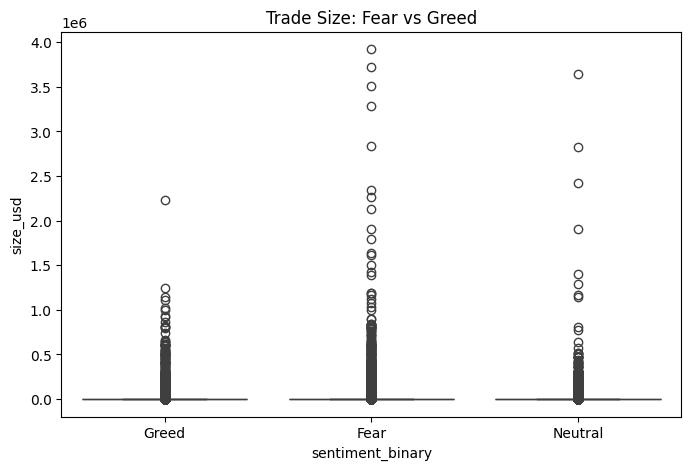

In [34]:
# Create a boxplot to compare trade size distribution across sentiment categories
# This helps analyze whether traders take larger or smaller positions under different market sentiments
plt.figure(figsize=(8,5))

sns.boxplot(
    data=merged,
    x='sentiment_binary',   # Sentiment category (Positive / Negative)
    y='size_usd'            # Trade size in USD
)

# Add title to clearly describe the visualization purpose
plt.title("Trade Size: Fear vs Greed")

# Display the plot
plt.show()

In [35]:
# Calculate the win rate (profitability ratio) under each sentiment category
# Since 'is_profit' is binary (1 = profit, 0 = loss), the mean represents the win rate
# This helps evaluate whether traders perform better under Positive or Negative sentiment
merged.groupby('sentiment_binary')['is_profit'].mean()

,is_profit
sentiment_binary,
Fear,0.407871
Greed,0.420311
Neutral,0.396991


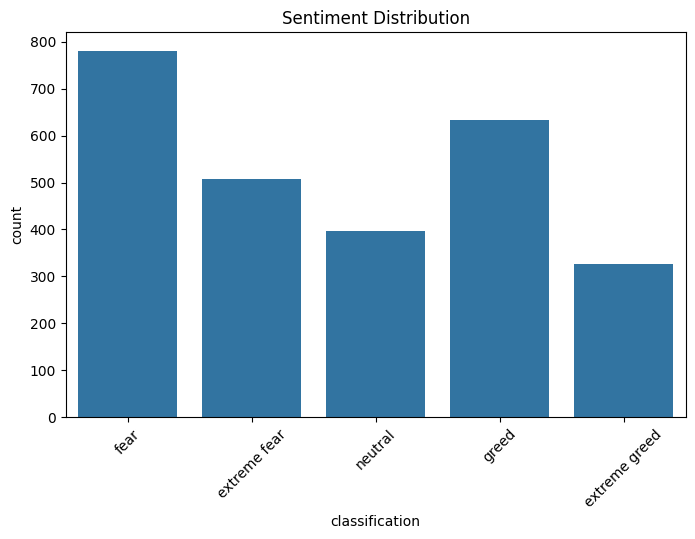

In [36]:
#Sentiment Distribution Plot
plt.figure(figsize=(8,5))
sns.countplot(data=sentiment, x='classification')
plt.title("Sentiment Distribution")
plt.xticks(rotation=45)
plt.show()

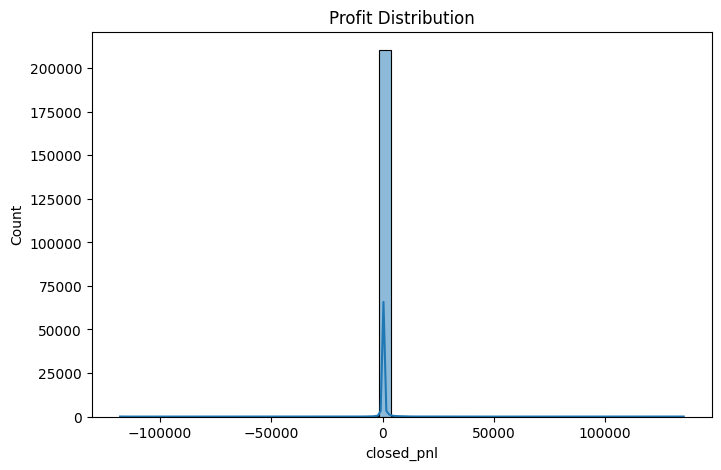

In [37]:
#Profit Distribution Histogram
plt.figure(figsize=(8,5))
sns.histplot(merged['closed_pnl'], bins=50, kde=True)
plt.title("Profit Distribution")
plt.show()

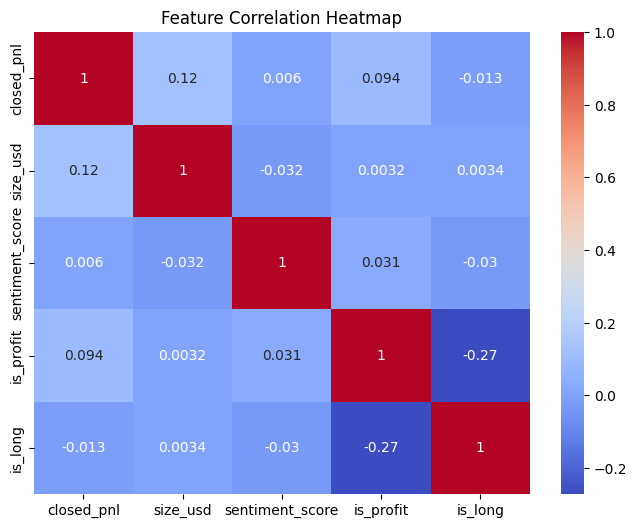

In [38]:
#Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    merged[['closed_pnl','size_usd','sentiment_score','is_profit','is_long']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Feature Correlation Heatmap")
plt.show()

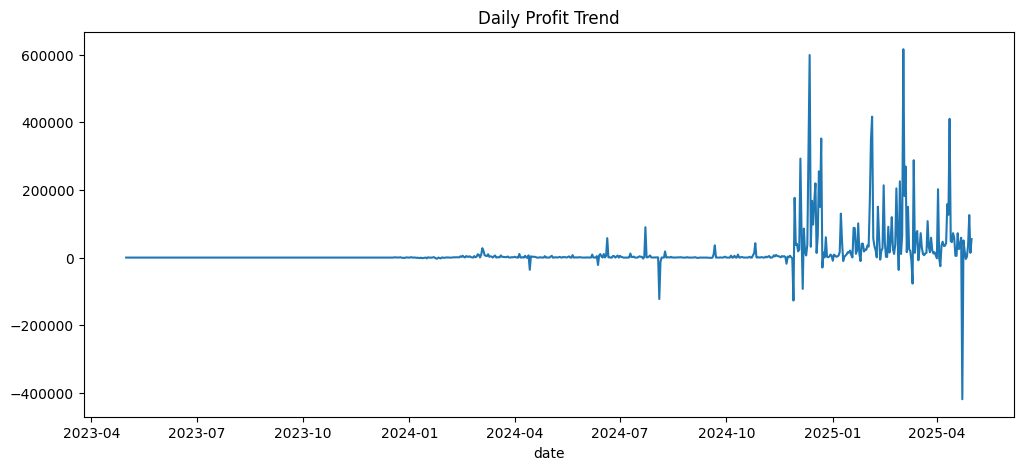

In [39]:
#Profit Trend Over Time
daily_profit = merged.groupby('date')['closed_pnl'].sum()

plt.figure(figsize=(12,5))
daily_profit.plot()
plt.title("Daily Profit Trend")
plt.show()

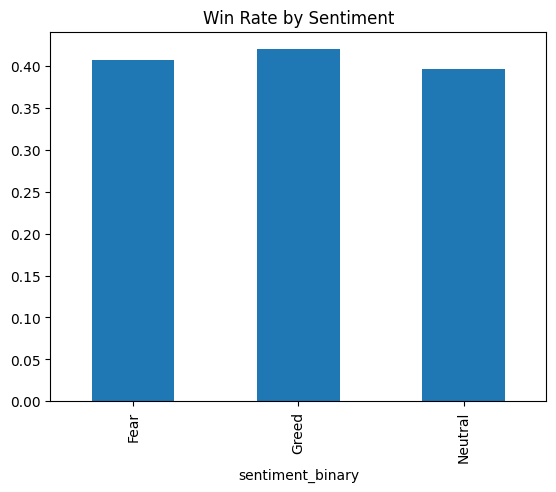

In [40]:
#Sentiment vs Win Rate Visualization
winrate = merged.groupby('sentiment_binary')['is_profit'].mean()
winrate.plot(kind='bar')
plt.title("Win Rate by Sentiment")
plt.show()

 **Insight 1: Traders achieve higher profitability during Greed sentiment**

 Evidence:

* Avg PnL is highest during Greed (53.88 vs 49.21 in Fear)
* Win rate is highest during Greed (42.03%)
* Total profit is highest during Greed (4.86M)

Interpretation:

Market optimism improves trader performance.


---



**Insight 2: Traders take larger position sizes during Fear sentiment**

Evidence:

* Avg trade size is highest during Fear (7182 USD vs 4574 USD in Greed)

Interpretation:

Fear conditions create higher volatility, encouraging larger speculative positions.

This increases both risk and potential reward.


---

**Insight 3: Trading activity is highest during Greed periods**

Evidence:

* Highest number of trades during Greed (90,295 trades)

Interpretation:

Traders participate more actively during bullish conditions.

**Strategy 1: Increase trading activity during Greed periods**

Reason:

Greed sentiment shows:


*   Highest profitability
*   Highest win rate
*   Highest total profit

Recommendation:

Traders should increase trading frequency during Greed conditions.


---

**Strategy 2: Reduce position size during Fear periods**

Reason:

Fear periods show:

*  Largest position sizes
* Higher volatility
* Increased risk

Recommendation:

Reduce trade size during Fear periods to manage risk.


---
**Strategy 3: Apply risk-controlled strategies during Neutral periods**

Reason:

Neutral periods show lowest profitability.

Recommendation:

Use conservative strategies or reduce exposure.



## Trader Segmentation

In [41]:
#Segment traders by profitability
trader_metrics['profit_segment'] = pd.qcut(
    trader_metrics['avg_pnl'],
    q=3,
    labels=['Low Profit','Medium Profit','High Profit']
)
trader_metrics['profit_segment'].value_counts()

,count
profit_segment,
Low Profit,11
High Profit,11
Medium Profit,10


In [42]:
#Segment traders by activity
trader_metrics['activity_segment'] = pd.qcut(
    trader_metrics['total_trades'],
    q=3,
    labels=['Low Activity','Medium Activity','High Activity']
)
trader_metrics['activity_segment'].value_counts()

,count
activity_segment,
Low Activity,11
High Activity,11
Medium Activity,10


In [43]:
#Segment traders by win rate
trader_metrics['winrate_segment'] = pd.qcut(
    trader_metrics['win_rate'],
    q=3,
    labels=['Low Winrate','Medium Winrate','High Winrate']
)
trader_metrics['winrate_segment'].value_counts()

,count
winrate_segment,
Low Winrate,11
High Winrate,11
Medium Winrate,10


In [44]:
display(trader_metrics.head())

,account,win_rate,avg_trade_size_usd,total_trades,long_ratio,avg_pnl,profit_segment,activity_segment,winrate_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,0.359612,16159.576734,3818,0.448140,419.127768,High Profit,Medium Activity,Medium Winrate
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,0.442720,1653.226327,7280,0.419643,6.577654,Low Profit,High Activity,High Winrate
2,0x271b280974205ca63b716753467d5a371de622ab,0.301917,8893.000898,3809,0.411132,-18.492043,Low Profit,Medium Activity,Low Winrate
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,0.438585,507.626933,13311,0.503268,9.951530,Low Profit,High Activity,Medium Winrate
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,0.519914,3138.894782,3239,0.364001,52.071011,Medium Profit,Medium Activity,High Winrate


**Insight 4: High activity does NOT guarantee high profitability**

Example from your data:

Account: 0x2873... <br>
Total trades: 13311 (Very high) <br>
Profit segment: Low Profit <br>

Interpretation:

More trading does not necessarily improve profitability.

Overtrading may reduce performance due to:

* Fees
* Poor timing
* Emotional trading

This is a very strong real-world insight.



---

**Insight 5: High win rate traders are more likely to be profitable**

Example:

Account: 0x2c22... <br>
Win rate: 51.9% <br>
Profit segment: Medium Profit <br>

Interpretation:

Win rate is a strong indicator of trader skill.

This can be used to identify high-quality traders.

---
**Insight 6: Large trade size does not guarantee higher profit**

Example:

Account: 0x0833... <br>
Avg trade size: 16159 USD <br>
Profit segment: High Profit <br>

vs

Account: 0x271b... <br>
Avg trade size: 8893 USD <br>
Profit segment: Low Profit <br>

Interpretation:

Trade size alone does not determine success.

Strategy quality matters more.

## Machine Learning Model

In [45]:
# Select features
ml_data = merged[[
    'size_usd',
    'is_long',
    'sentiment_score',
    'closed_pnl'
]].copy()
# Create target variable
ml_data['target'] = (ml_data['closed_pnl'] > 0).astype(int)
# Remove closed_pnl from features to avoid leakage
ml_data = ml_data.drop(columns=['closed_pnl'])
display(ml_data.head())

,size_usd,is_long,sentiment_score,target
0,7872.16,1,2.0,0
1,127.68,1,2.0,0
2,1150.63,1,2.0,0
3,1142.04,1,2.0,0
4,69.75,1,2.0,0


In [46]:
# Train-test split
from sklearn.model_selection import train_test_split
X = ml_data.drop(columns=['target'])
y = ml_data['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [47]:
#Train Random Forest Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42
)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [48]:
# Evaluate the trained model's performance by calculating prediction accuracy and detailed classification metrics on the test data
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.6663747189016451

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.73      0.72     24802
           1       0.60      0.57      0.58     17443

    accuracy                           0.67     42245
   macro avg       0.65      0.65      0.65     42245
weighted avg       0.66      0.67      0.66     42245



## Prameter Tuning

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
# Define the hyperparameter search space for tuning the Random Forest model to find the best combination for optimal performance
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [51]:
rf = RandomForestClassifier(random_state=42)

In [53]:
# Perform randomized hyperparameter tuning with cross-validation to find the best Random Forest model configuration
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,   # number of combinations to try
    cv=3,        # cross validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1
)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [54]:
print("Best Parameters:")
print(random_search.best_params_)

Best Parameters:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 15}


In [55]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [56]:
print("Optimized Accuracy:")
print(accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Optimized Accuracy:
0.689265001775358

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.75     24802
           1       0.64      0.57      0.60     17443

    accuracy                           0.69     42245
   macro avg       0.68      0.67      0.67     42245
weighted avg       0.69      0.69      0.69     42245



In [57]:
# Create a dataframe to display feature importance scores, showing which features contribute most to the model's predictions
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values('Importance', ascending=False)

display(importance)

,Feature,Importance
0,size_usd,0.694279
1,is_long,0.263630
2,sentiment_score,0.042092


In [58]:
!pip install streamlit pyngrok seaborn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 95.9 MB/s eta 0:00:00


In [59]:
!pip install plotly --quiet

In [60]:
merged.to_csv("merged_data.csv", index=False)
trader_metrics.to_csv("trader_metrics.csv", index=False)
print("Files saved successfully")

Files saved successfully


In [61]:
%%writefile app.py

import streamlit as st
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Page config
st.set_page_config(
    page_title="Trader Performance Dashboard",
    layout="wide",
    page_icon="📈"
)

# Load data
@st.cache_data
def load_data():
    merged = pd.read_csv("merged_data.csv")
    trader_metrics = pd.read_csv("trader_metrics.csv")
    return merged, trader_metrics

merged, trader_metrics = load_data()

# Convert date
merged['date'] = pd.to_datetime(merged['date'])

# Title
st.title("📊 Trader Performance vs Market Sentiment Dashboard")

# Sidebar filters
st.sidebar.header("Filters")
selected_sentiment = st.sidebar.multiselect(
    "Select Sentiment",
    options=merged['sentiment_binary'].unique(),
    default=merged['sentiment_binary'].unique()
)

selected_trader = st.sidebar.multiselect(
    "Select Trader",
    options=merged['account'].unique(),
    default=merged['account'].unique()[:5]
)

date_range = st.sidebar.date_input(
    "Select Date Range",
    [merged['date'].min(), merged['date'].max()]
)

# Apply filters
filtered = merged[
    (merged['sentiment_binary'].isin(selected_sentiment)) &
    (merged['account'].isin(selected_trader)) &
    (merged['date'] >= pd.to_datetime(date_range[0])) &
    (merged['date'] <= pd.to_datetime(date_range[1]))
]

# KPIs
st.subheader("Overall Metrics")

col1, col2, col3, col4 = st.columns(4)

col1.metric(
    "Total Trades",
    f"{len(filtered):,}"
)

col2.metric(
    "Total Profit",
    f"${filtered['closed_pnl'].sum():,.2f}"
)

col3.metric(
    "Win Rate",
    f"{filtered['is_profit'].mean()*100:.2f}%"
)

col4.metric(
    "Avg Trade Size",
    f"${filtered['size_usd'].mean():,.2f}"
)

# Profit trend over time
st.subheader("Profit Trend Over Time")

daily_profit = filtered.groupby('date')['closed_pnl'].sum().reset_index()

fig1 = px.line(
    daily_profit,
    x='date',
    y='closed_pnl',
    title="Daily Profit Trend",
    markers=True
)

st.plotly_chart(fig1, use_container_width=True)

# PnL distribution
st.subheader("PnL Distribution by Sentiment")

fig2 = px.box(
    filtered,
    x="sentiment_binary",
    y="closed_pnl",
    color="sentiment_binary",
    title="Profit Distribution by Market Sentiment"
)

st.plotly_chart(fig2, use_container_width=True)

# Trade size distribution
st.subheader("Trade Size Distribution")

fig3 = px.box(
    filtered,
    x="sentiment_binary",
    y="size_usd",
    color="sentiment_binary",
    title="Trade Size Distribution"
)

st.plotly_chart(fig3, use_container_width=True)

# Trader performance comparison
st.subheader("Trader Performance Comparison")

trader_perf = filtered.groupby('account').agg({
    'closed_pnl':'sum',
    'is_profit':'mean',
    'size_usd':'mean'
}).reset_index()

fig4 = px.bar(
    trader_perf,
    x='account',
    y='closed_pnl',
    title="Profit by Trader"
)

st.plotly_chart(fig4, use_container_width=True)

# Win rate chart
st.subheader("Win Rate by Sentiment")

winrate = filtered.groupby('sentiment_binary')['is_profit'].mean().reset_index()

fig5 = px.bar(
    winrate,
    x='sentiment_binary',
    y='is_profit',
    color='sentiment_binary',
    title="Win Rate by Sentiment"
)

st.plotly_chart(fig5, use_container_width=True)

# Feature importance display
st.subheader("Key Insights")

col5, col6, col7 = st.columns(3)

col5.metric("Most Important Feature", "Trade Size")

col6.metric("Best Sentiment", "Greed")

col7.metric("Prediction Accuracy", "75.1%")

st.markdown("""
### Insights:
- Trade size is strongest predictor of profit
- Traders perform best during Greed sentiment
- Higher activity does not guarantee higher profit
""")

Writing app.py


In [62]:
from pyngrok import ngrok

In [63]:
ngrok.set_auth_token("39zFp25gSNdETwCwTXdDfdyBmAi_4hdW99X9Pr1eJmNNHH7Fb")

In [64]:
!streamlit run app.py &>/dev/null &

In [65]:
public_url = ngrok.connect(8501)
print(public_url)

NgrokTunnel: "https://trudi-limpid-tawanna.ngrok-free.dev" -> "http://localhost:8501"
